In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Data

In [27]:
df = pd.read_excel('cpsaat11 - Copy.xlsx');

# Employment by Occupation
## General
Below is a list of the general categories of occupations for this excel sheet. Broadness refers to the broadness of the category for lack of a better term. All the occupations in the data can be divided into the following categories below. 

Note: All the data is from the United States in 2019.

In [28]:
generalCategories = df.loc[df['Broadness'] == 1]
generalCategories[['Occupation', 'Total Employed']]

,Occupation,Total Employed
1,"Management, professional, and related occupations",64218
208,Service occupations,26978
282,Sales and office occupations,33370
355,"Natural resources, construction, and maintenan...",14343
445,"Production, transportation, and material movin...",18628


Plotting this data on a pie chart we can see the distribution of the workforce among these categories

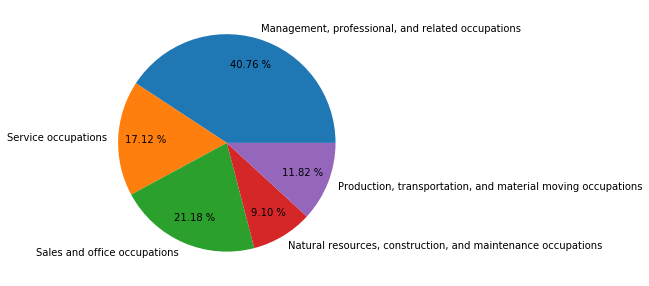

In [29]:
data = []
labels = []
for index, row in generalCategories.iterrows():
    data.append(row['Total Employed'])
    labels.append(row['Occupation'])
plt.figure(figsize=(5,5))
plt.pie(data, labels=labels, autopct='%.2f %%', pctdistance=0.75)
plt.show()

## Management, professional, and related occupations
Now lets break down the workforce in the above category. The two categories shown below are split between management and professional occupations. 

In [30]:
subcat1 = df.loc[df['Parent Category'] == 'Management, professional, and related occupations'][['Occupation', 'Total Employed']]
subcat1

,Occupation,Total Employed
2,"Management, business, and financial operations...",26981
63,Professional and related occupations,37237


Management, business, and financial operations occupations can be further subdivided into Management and business/financial occupations. 

In [31]:
subCatMBF = df.loc[df['Parent Category'] == 'Management, business, and financial operations occupations'][['Occupation', 'Total Employed']]
subCatMBF

,Occupation,Total Employed
3,Management occupations,18985
34,Business and financial operations occupations,7996


Below is a list of the various management occupations.

In [32]:
subCatManagement = df.loc[df['Parent Category'] == 'Management occupations'][['Occupation', 'Total Employed']]
subCatManagement

,Occupation,Total Employed
4,Chief executives,1602
5,General and operations managers,1058
6,Legislators,19
7,Advertising and promotions managers,55
8,Marketing and sales managers,1184
9,Public relations and fundraising managers,73
10,Administrative services managers,184
11,Computer and information systems managers,654
12,Financial managers,1194
13,Compensation and benefits managers,24


Putting them in a pie chart we can view the distribution of the various management occupations.

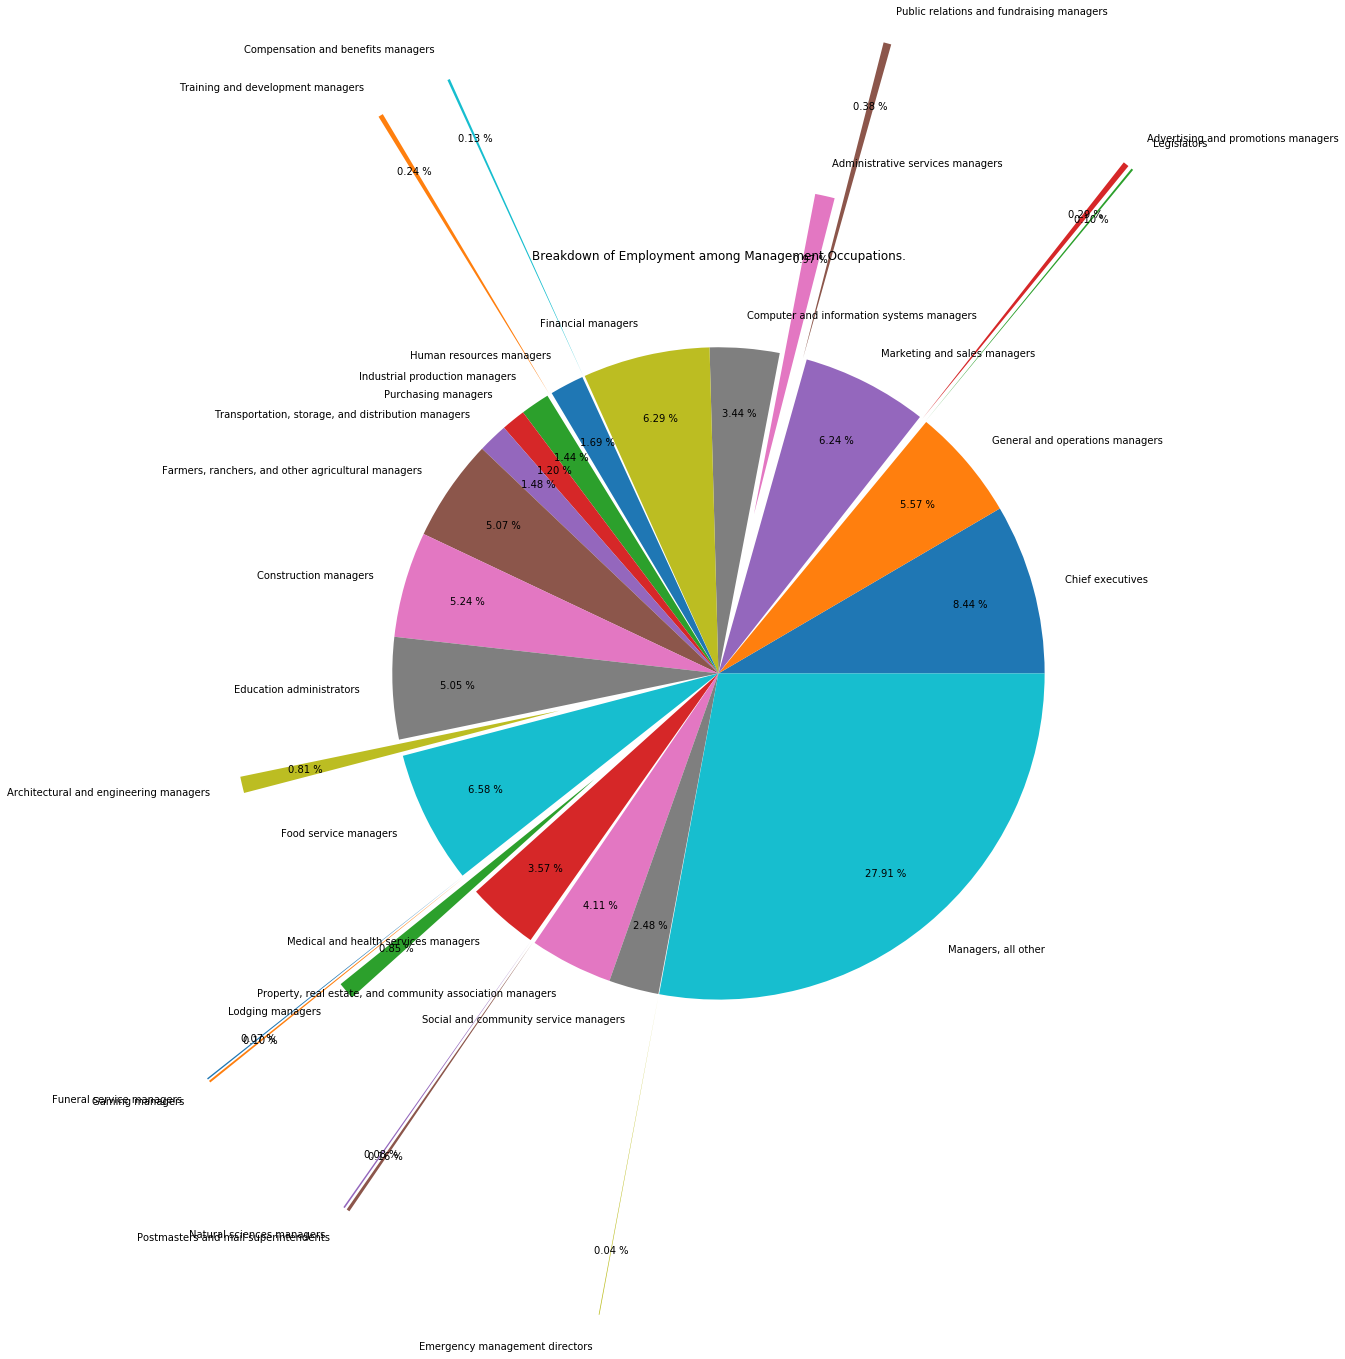

In [33]:
data = []
labels = []
explode = []
for index, row in subCatManagement.iterrows():
    data.append(row['Total Employed'])
    labels.append(row['Occupation'])
    if row['Total Employed'] / 18985 < 0.005:
        explode.append(1)
    elif row['Total Employed'] / 18985 < 0.01:
        explode.append(0.5)
    else:
        explode.append(0)
plt.figure(figsize=(15, 15))
plt.pie(data, labels=labels, autopct="%.2f %%", pctdistance=0.8, explode=explode)
plt.title("Breakdown of Employment among Management Occupations.")
plt.show()

For business and financial occupations the occupations are listed as follows.

In [34]:
subCatBF = df.loc[df['Parent Category'] == 'Business and financial operations occupations'][['Occupation', 'Total Employed']]
subCatBF

,Occupation,Total Employed
35,"Agents and business managers of artists, perfo...",47
36,"Buyers and purchasing agents, farm products",16
37,"Wholesale and retail buyers, except farm products",226
38,"Purchasing agents, except wholesale, retail, a...",279
39,"Claims adjusters, appraisers, examiners, and i...",318
40,Compliance officers,298
41,Cost estimators,127
42,Human resources workers,770
43,"Compensation, benefits, and job analysis speci...",51
44,Training and development specialists,125


The breakdown for the above data is as follows.

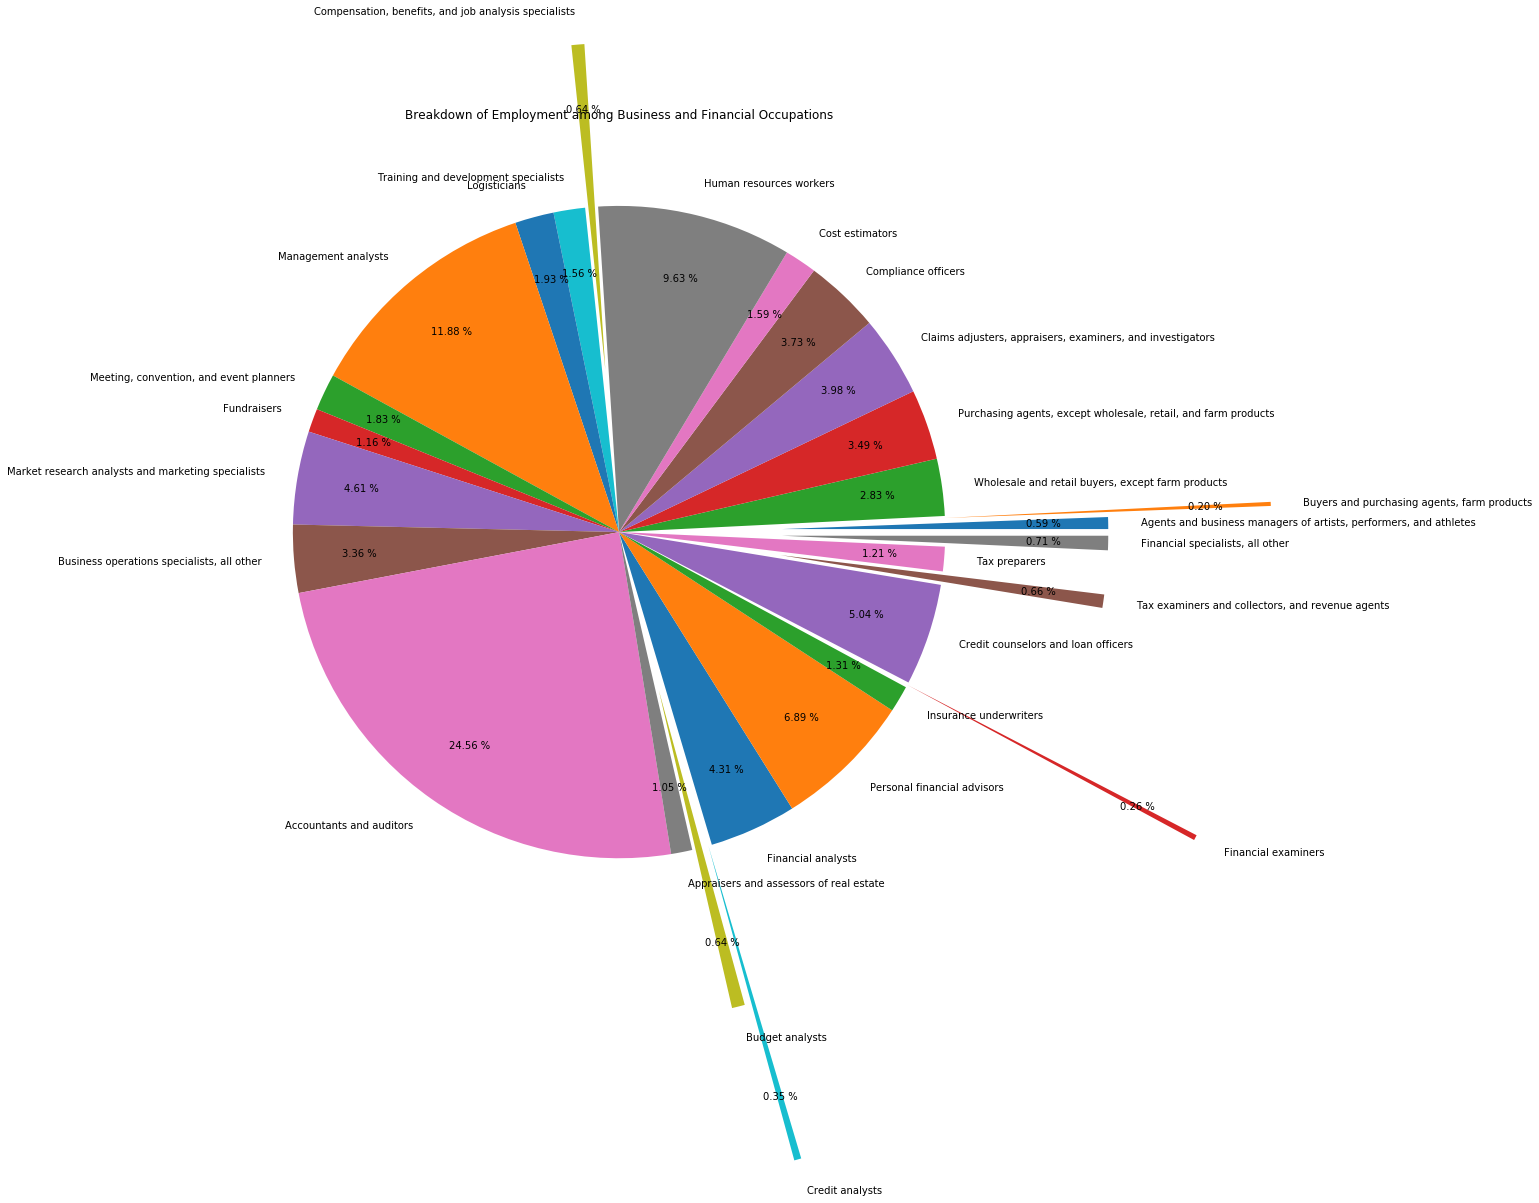

In [35]:
data = [];
labels = [];
explode = []
for index, row in subCatBF.iterrows():
    data.append(row['Total Employed'])
    labels.append(row['Occupation'])
    if row['Total Employed'] / 7996 < 0.005:
        explode.append(1)
    elif row['Total Employed'] / 7996 < 0.01:
        explode.append(0.5)
    else:
        explode.append(0)
plt.figure(figsize=(15, 15))
plt.pie(data, labels=labels, autopct="%.2f %%", pctdistance=0.8, explode=explode)
plt.title("Breakdown of Employment among Business and Financial Occupations")
plt.show()

# Employment over Time

In [46]:
employment = pd.read_excel('aat1_csv.xlsx')

Below is a line graph of the unemployment rate over time. Based on the graph it appears that the unemployment has been fluctuating over time remaining below 10% in the given time period. However unemployment is only one factor and does not accurately portray the true unemployment in the United States.

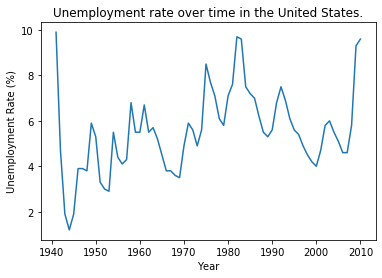

In [47]:
plt.plot(employment['year'], employment['unemployed_percent'])
plt.title('Unemployment rate over time in the United States.')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

Another way to view the unemployment rate is by looking at labor force participation. Below is a line graph representing the population and the labor force population in the United States.

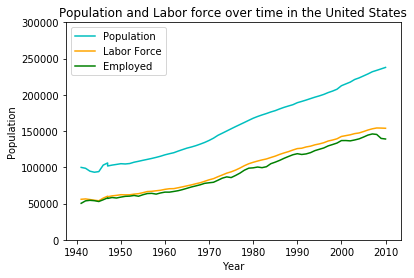

In [79]:
plt.plot(employment['year'], employment['population'], 'c', label="Population")
plt.plot(employment['year'], employment['labor_force'], 'orange', label="Labor Force")
plt.plot(employment['year'], employment['employed_total'], 'g', label="Employed")
plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Population and Labor force over time in the United States")
plt.ylim(0, 300000)
plt.legend()
plt.show()

Taking both graphs into account we can plot the labor force percentage and the employed percentage with respect to the United States population.

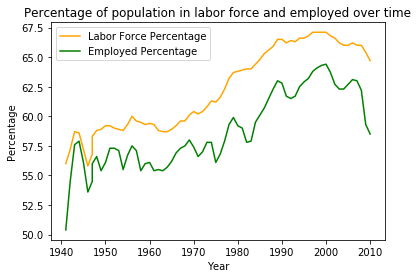

In [80]:
plt.plot(employment['year'], employment['population_percent'], 'orange', label="Labor Force Percentage")
plt.plot(employment['year'], employment['employed_percent'], 'g', label="Employed Percentage")
plt.title('Percentage of population in labor force and employed over time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()